Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [2]:
df=pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


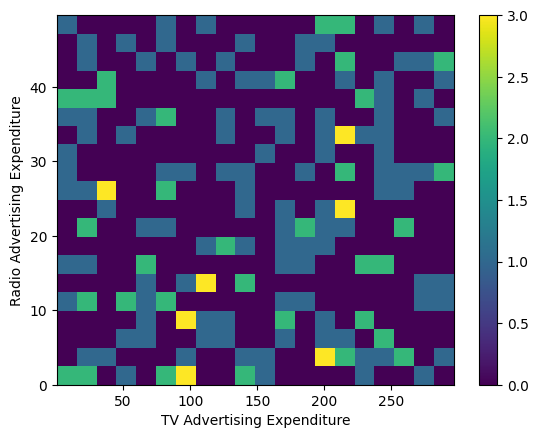

In [39]:
# Sales Distribution by TV and Radio Advertising Expenditure

import matplotlib.pyplot as plt
plt.hist2d(df['TV'], df['Radio'], bins=20, cmax=10, cmap='viridis')
plt.colorbar()
plt.xlabel('TV Advertising Expenditure')
_ = plt.ylabel('Radio Advertising Expenditure')

In [3]:
df.shape

(200, 4)

In [19]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


From above information:  
Max Sales=27, Min Sales=1.6

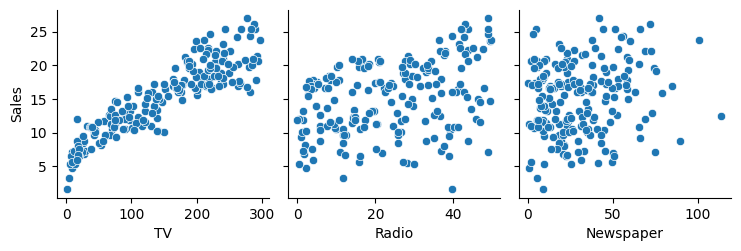

In [18]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter')

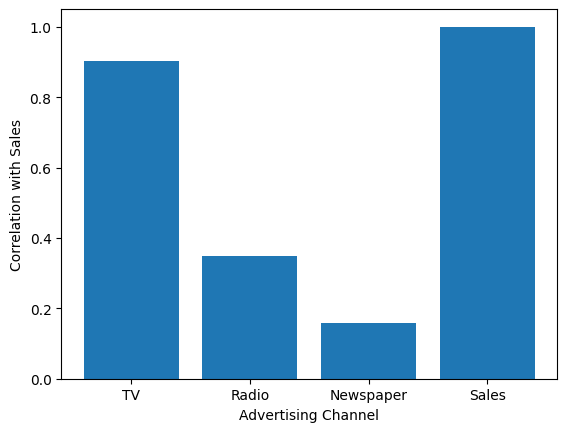

In [24]:
#Correlation between Advertising Channels and Sales
correlations = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
plt.bar(correlations.columns, correlations['Sales'])
plt.xlabel('Advertising Channel')
_ = plt.ylabel('Correlation with Sales')

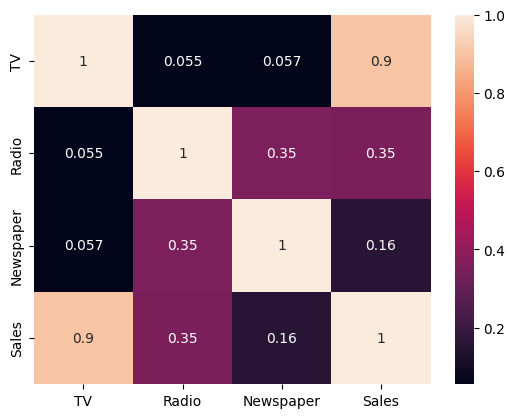

In [25]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Sales is highly correlated with TV

Model Training

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(df[['TV']],df[['Sales']], test_size=0.2, random_state=0)

In [29]:
print(X_train)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]


In [38]:
print(Y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2


Model Prediction

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
prediction=model.predict(X_test)
print(prediction)

[[10.92912965]
 [ 9.88399105]
 [12.08313684]
 [22.93189318]
 [16.42699412]
 [10.22148373]
 [ 7.63585439]
 [20.23195181]
 [ 8.45781235]
 [17.91849399]
 [21.38595901]
 [11.90894708]
 [15.68668762]
 [17.38503783]
 [11.32105662]
 [13.70527904]
 [21.62002651]
 [ 7.20037998]
 [11.22851831]
 [18.77855596]
 [22.81758114]
 [14.7994085 ]
 [16.6937222 ]
 [14.33127351]
 [10.07451111]
 [13.86313851]
 [16.17659633]
 [18.32130782]
 [19.35555956]
 [ 8.52857694]
 [10.85292163]
 [17.98925858]
 [22.44198446]
 [20.3190467 ]
 [ 7.88080875]
 [ 8.18019741]
 [10.40656035]
 [17.00399772]
 [10.88558221]
 [ 8.52313351]]


In [33]:
model.coef_

array([[0.0544343]])

In [34]:
model.intercept_

array([7.16227597])

In [37]:
0.0544343*69.2+7.16227597

10.929129529999999

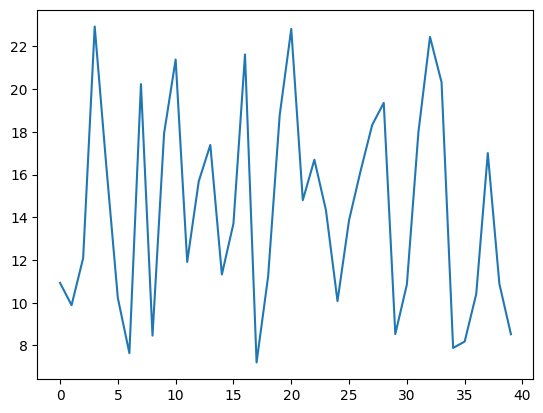

In [35]:
plt.plot(prediction)

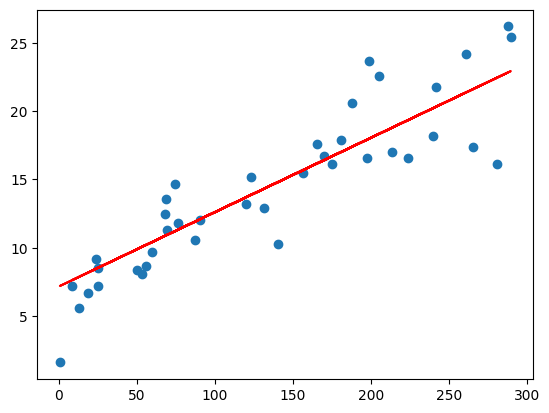

In [36]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 7.16227597+0.0544343*X_test, 'r')
plt.show()